In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

In [2]:
x_train = pd.read_csv('Datasets/X_Train With Yeo Johnson 70-30.csv')

x_test = pd.read_csv('Datasets/X_Test With Yeo Johnson 70-30.csv')

y_train = pd.read_csv('Datasets/Y_Train With Yeo Johnson 70-30.csv')

y_test = pd.read_csv('Datasets/Y_Test With Yeo Johnson 70-30.csv')

# Dimentionality Reduction Using Principle Component Analysis

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
 
#apply PCA to transform the features to 2
X_pca = pca.fit_transform(x_train)

X_pca = pd.DataFrame(X_pca)

X = X_pca

In [4]:
X = x_train
Y = y_train

In [5]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [6]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [7]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [8]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9516129032258065
[[ 22   0   1]
 [  2   2   3]
 [  6   0 212]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       1.00      0.29      0.44         7
           2       0.98      0.97      0.98       218

    accuracy                           0.95       248
   macro avg       0.90      0.74      0.75       248
weighted avg       0.96      0.95      0.95       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9589904420549582
f1 Score  0.9483161663673317
Recall  0.9516129032258065
Specificity/TNR: 1.0
Cohen Kappa: 0.7829638273045507
AUC Score  0.9362027561931731


In [11]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9589904420549582,
  0.9516129032258065,
  0.9483161663673317,
  0.7829638273045507,
  0.9362027561931731]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(X, Y)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.19966946, 0.03600874, 0.05196013, 0.04980187, 0.05036349,
        0.03520641, 0.04278669, 0.0324095 , 0.0472739 , 0.03889525,
        0.04378204, 0.05415423, 0.05953994, 0.05076337, 0.03869627,
        0.04986658, 0.0455807 , 0.03530669, 0.02732811, 0.03749306,
        0.20964215, 0.04198573, 0.04837124, 0.04866862, 0.05295625,
        0.04248505, 0.04348238, 0.03081975, 0.04657588, 0.04029772,
        0.03221138, 0.03899305, 0.04558494, 0.04129195, 0.02533174,
        0.03840461, 0.04637268, 0.03760102, 0.02802477, 0.03790066,
        0.2486335 , 0.06552398, 0.06562366, 0.0494673 , 0.04617584,
        0.05006561, 0.04208663, 0.0288409 , 0.04308336, 0.05206008,
        0.05564721, 0.06791775, 0.07659457, 0.05784476, 0.03829613,
        0.05485299, 0.05644786, 0.05375431, 0.03111713, 0.04448318,
        0.28194275, 0.05984197, 0.05964015, 0.05993977, 0.06751914,
        0.069315  , 0.04757581, 0.03240929, 0.04358222, 0.05339024,
        0.03769624, 0.04038987,

In [13]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199669,0.019832,0.007081,0.000832,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.844828,0.844828,...,0.810345,0.827586,0.810345,0.810345,0.844828,0.859649,0.859649,0.833999,0.018516,273
1,0.036009,0.003041,0.002586,0.000653,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.948276,...,0.896552,0.879310,0.913793,0.913793,0.931034,0.929825,0.947368,0.913581,0.026518,156
2,0.051960,0.007239,0.003391,0.003867,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.879310,0.896552,...,0.896552,0.913793,0.896552,0.896552,0.827586,0.912281,0.929825,0.884211,0.039854,212
3,0.049802,0.004024,0.003098,0.000942,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.793103,0.793103,...,0.758621,0.758621,0.706897,0.810345,0.655172,0.824561,0.807018,0.770054,0.050003,383
4,0.050363,0.006783,0.004088,0.001134,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.948276,0.931034,...,0.913793,0.879310,0.931034,0.931034,0.931034,0.964912,0.947368,0.922263,0.033685,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.040192,0.005222,0.002793,0.001773,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.913793,0.931034,...,0.913793,0.879310,0.931034,0.931034,0.913793,0.929825,0.947368,0.913581,0.028672,156
396,0.045581,0.002484,0.003089,0.000936,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,282
397,0.132045,0.015990,0.001696,0.000779,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.931034,0.948276,...,0.896552,0.913793,0.931034,0.913793,0.948276,0.912281,0.947368,0.918724,0.029854,79
398,0.024930,0.001485,0.002197,0.000602,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,282


In [14]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.833999
1,1,linear,0.913581
2,1,poly,0.884211
3,1,sigmoid,0.770054
4,1,rbf,0.922263
...,...,...,...
395,20,sigmoid,0.913581
396,20,rbf,0.816636
397,20,linear,0.918724
398,20,poly,0.816636


In [15]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9343920145190563
{'C': 15, 'gamma': 0.01, 'kernel': 'rbf'}


In [16]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78        23
           1       0.50      0.29      0.36         7
           2       0.99      0.97      0.98       218

    accuracy                           0.94       248
   macro avg       0.72      0.72      0.71       248
weighted avg       0.95      0.94      0.94       248



In [17]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9477165193729146
f1 Score  0.9430731421693924
Recall  0.9435483870967742
Specificity/TNR: 0.9130434782608695
Cohen Kappa: 0.7576941866145579
AUC Score  0.9621644391203982


In [18]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9343920145190563,
  0.9477165193729146,
  0.9435483870967742,
  0.9430731421693924,
  0.7576941866145579,
  0.9621644391203982]}

# Logistic Regression Train, Test

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.917
Testing Accuracy: 0.927
[[ 20   2   1]
 [  4   0   3]
 [  8   0 210]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.73        23
           1       0.00      0.00      0.00         7
           2       0.98      0.96      0.97       218

    accuracy                           0.93       248
   macro avg       0.54      0.61      0.57       248
weighted avg       0.92      0.93      0.92       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9205654582454025
f1 Score  0.9220633756924078
Recall  0.9274193548387096
Specificity/TNR: 0.9090909090909091
Cohen Kappa: 0.683449156148064
AUC Score  0.9754840822740828


In [21]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9589904420549582,
  0.9516129032258065,
  0.9483161663673317,
  0.7829638273045507,
  0.9362027561931731],
 'LR': [0.9274193548387096,
  0.9205654582454025,
  0.9274193548387096,
  0.9220633756924078,
  0.683449156148064,
  0.9754840822740828]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [22]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(X, Y)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00927408, 0.03719974, 0.00548921, 0.03031573, 0.0108705 ,
        0.04159327, 0.00568571, 0.02921255, 0.01306226, 0.03859582,
        0.00518799, 0.03211372, 0.01396117, 0.04019132, 0.00608859,
        0.03001413, 0.01486151, 0.04168499, 0.00608287, 0.03021829,
        0.01446028, 0.04049397, 0.00548465, 0.0296149 , 0.01395931,
        0.04318368, 0.00628273, 0.03640132, 0.015657  , 0.05874238,
        0.0077781 , 0.03739941, 0.01725256, 0.05934064, 0.00698059,
        0.03690016, 0.01645494, 0.04058836, 0.00628548, 0.02851734]),
 'std_fit_time': array([0.00100223, 0.00514607, 0.00120207, 0.00509157, 0.00069854,
        0.00411943, 0.00090105, 0.00429543, 0.00180831, 0.00370619,
        0.00074931, 0.00408252, 0.00213986, 0.00236324, 0.00105501,
        0.00297257, 0.00220612, 0.00599487, 0.00094058, 0.00406548,
        0.00135681, 0.00346385, 0.00091965, 0.00315337, 0.00240741,
        0.00327905, 0.00109679, 0.00655919, 0.00232048, 0.00719836,
        0.002

In [23]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199669,0.019832,0.007081,0.000832,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.844828,0.844828,...,0.810345,0.827586,0.810345,0.810345,0.844828,0.859649,0.859649,0.833999,0.018516,273
1,0.036009,0.003041,0.002586,0.000653,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.913793,0.948276,...,0.896552,0.879310,0.913793,0.913793,0.931034,0.929825,0.947368,0.913581,0.026518,156
2,0.051960,0.007239,0.003391,0.003867,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.879310,0.896552,...,0.896552,0.913793,0.896552,0.896552,0.827586,0.912281,0.929825,0.884211,0.039854,212
3,0.049802,0.004024,0.003098,0.000942,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.793103,0.793103,...,0.758621,0.758621,0.706897,0.810345,0.655172,0.824561,0.807018,0.770054,0.050003,383
4,0.050363,0.006783,0.004088,0.001134,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.948276,0.931034,...,0.913793,0.879310,0.931034,0.931034,0.931034,0.964912,0.947368,0.922263,0.033685,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.040192,0.005222,0.002793,0.001773,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.913793,0.931034,...,0.913793,0.879310,0.931034,0.931034,0.913793,0.929825,0.947368,0.913581,0.028672,156
396,0.045581,0.002484,0.003089,0.000936,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,282
397,0.132045,0.015990,0.001696,0.000779,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.931034,0.948276,...,0.896552,0.913793,0.931034,0.913793,0.948276,0.912281,0.947368,0.918724,0.029854,79
398,0.024930,0.001485,0.002197,0.000602,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.827586,0.827586,...,0.810345,0.810345,0.810345,0.810345,0.810345,0.824561,0.824561,0.816636,0.007765,282


In [24]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.833999
1,1,linear,0.913581
2,1,poly,0.884211
3,1,sigmoid,0.770054
4,1,rbf,0.922263
...,...,...,...
395,20,sigmoid,0.913581
396,20,rbf,0.816636
397,20,linear,0.918724
398,20,poly,0.816636


In [25]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.9135813672111313
{'C': 2.7825594022071245, 'penalty': 'l2', 'solver': 'liblinear'}


In [26]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74        23
           1       0.00      0.00      0.00         7
           2       0.98      0.96      0.97       218

    accuracy                           0.93       248
   macro avg       0.53      0.62      0.57       248
weighted avg       0.92      0.93      0.92       248



In [27]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9198063937069603
f1 Score  0.9208546870506855
Recall  0.9274193548387096
Specificity/TNR: 0.9545454545454546
Cohen Kappa: 0.6874168475596947
AUC Score  0.9765474641978771


In [28]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9343920145190563,
  0.9477165193729146,
  0.9435483870967742,
  0.9430731421693924,
  0.7576941866145579,
  0.9621644391203982],
 'LR': [0.9135813672111313,
  0.9198063937069603,
  0.9274193548387096,
  0.9208546870506855,
  0.6874168475596947,
  0.9765474641978771]}

# KNN Train, Test

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9475806451612904
0.9475806451612904
[[ 21   2   0]
 [  1   3   3]
 [  4   3 211]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.38      0.43      0.40         7
           2       0.99      0.97      0.98       218

    accuracy                           0.95       248
   macro avg       0.72      0.77      0.74       248
weighted avg       0.95      0.95      0.95       248



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [30]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9522010012522901
f1 Score  0.9494676992660863
Recall  0.9475806451612904
Specificity/TNR: 0.9130434782608695
Cohen Kappa: 0.7729257641921398
AUC Score  0.9280079458825526


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [31]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9516129032258065,
  0.9589904420549582,
  0.9516129032258065,
  0.9483161663673317,
  0.7829638273045507,
  0.9362027561931731],
 'LR': [0.9274193548387096,
  0.9205654582454025,
  0.9274193548387096,
  0.9220633756924078,
  0.683449156148064,
  0.9754840822740828],
 'KNN': [0.9475806451612904,
  0.9522010012522901,
  0.9475806451612904,
  0.9494676992660863,
  0.7729257641921398,
  0.9280079458825526]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [32]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(X, Y)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.00957394, 0.0069808 , 0.00777936, 0.00887558, 0.00777862,
        0.00727935, 0.00977416, 0.0106703 , 0.00787823, 0.00997269,
        0.00947449, 0.00967443, 0.00678174, 0.00947382, 0.00708053,
        0.01047256, 0.00827806, 0.00747986, 0.00628192, 0.00817716,
        0.01107047, 0.00618279, 0.00668161, 0.0103842 , 0.01176839,
        0.00847652, 0.00757985, 0.00737977, 0.00857687, 0.01256597,
        0.00727978, 0.00817752, 0.00877604, 0.00678129, 0.00767896,
        0.0108701 , 0.00777881, 0.00867665, 0.00887585, 0.00678132,
        0.00718043, 0.00917482, 0.01107035, 0.00847676, 0.00777905,
        0.00987339, 0.00708034, 0.00847709, 0.01027191, 0.00678186,
        0.00698082, 0.00877633, 0.00857666, 0.01037109, 0.00728002,
        0.00977426, 0.00767856, 0.00877581, 0.00917532, 0.00927515,
        0.0091747 , 0.0067821 , 0.00897536, 0.01027257, 0.00648263,
        0.0100723 , 0.00668154, 0.01136916, 0.00877597, 0.00957377,
        0.00747988, 0.00967367,

In [33]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009574,0.003489,0.009973,0.003217,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.862069,0.948276,...,0.896552,0.896552,0.913793,0.862069,0.879310,0.929825,0.929825,0.892861,0.038933,100
1,0.006981,0.000631,0.005984,0.001728,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.862069,0.948276,...,0.896552,0.896552,0.913793,0.862069,0.879310,0.929825,0.929825,0.892861,0.038933,100
2,0.007779,0.001247,0.009075,0.001372,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.862069,0.948276,...,0.862069,0.879310,0.896552,0.862069,0.844828,0.894737,0.877193,0.875469,0.031472,119
3,0.008876,0.001967,0.005984,0.001410,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.862069,0.948276,...,0.896552,0.896552,0.913793,0.862069,0.879310,0.929825,0.929825,0.892861,0.038933,100
4,0.007779,0.001715,0.009874,0.003230,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.862069,0.931034,...,0.948276,0.913793,0.965517,0.896552,0.879310,0.912281,0.929825,0.906624,0.039371,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009474,0.009155,0.005486,0.000670,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.896552,0.948276,...,0.931034,0.896552,0.931034,0.913793,0.948276,0.947368,0.947368,0.922232,0.027902,6
116,0.008377,0.003969,0.016457,0.011701,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.879310,0.931034,...,0.931034,0.896552,0.948276,0.931034,0.913793,0.947368,0.947368,0.918784,0.028719,11
117,0.010372,0.008080,0.006283,0.003249,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.896552,0.948276,...,0.931034,0.896552,0.931034,0.913793,0.948276,0.947368,0.947368,0.922232,0.027902,6
118,0.010272,0.009325,0.007979,0.000446,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.879310,0.931034,...,0.931034,0.896552,0.931034,0.931034,0.896552,0.929825,0.947368,0.913581,0.026518,32


In [34]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.892861
1,minkowski,1,0.892861
2,minkowski,2,0.875469
3,minkowski,2,0.892861
4,minkowski,3,0.906624
...,...,...,...
115,manhattan,18,0.922232
116,manhattan,19,0.918784
117,manhattan,19,0.922232
118,manhattan,20,0.913581


In [35]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9257410768300062
{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}


In [36]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       1.00      0.29      0.44         7
           2       0.97      0.98      0.97       218

    accuracy                           0.95       248
   macro avg       0.92      0.71      0.75       248
weighted avg       0.95      0.95      0.95       248



In [37]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9536089621953
f1 Score  0.9468361419322179
Recall  0.9516129032258065
Specificity/TNR: 1.0
Cohen Kappa: 0.7663500039255712
AUC Score  0.9730249021591768


In [38]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9343920145190563,
  0.9477165193729146,
  0.9435483870967742,
  0.9430731421693924,
  0.7576941866145579,
  0.9621644391203982],
 'LR': [0.9135813672111313,
  0.9198063937069603,
  0.9274193548387096,
  0.9208546870506855,
  0.6874168475596947,
  0.9765474641978771],
 'KNN': [0.9257410768300062,
  0.9536089621953,
  0.9516129032258065,
  0.9468361419322179,
  0.7663500039255712,
  0.9730249021591768]}

# Before Normalization

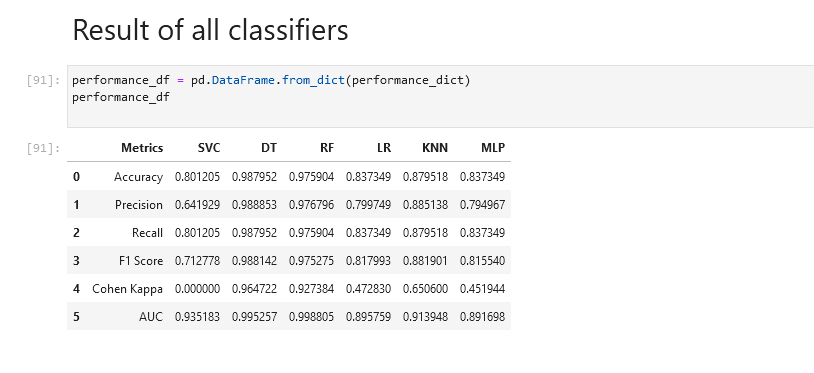

# Result of all classifiers

In [39]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.951613,0.927419,0.947581
1,Precision,0.958990,0.920565,0.952201
2,Recall,0.951613,0.927419,0.947581
3,F1 Score,0.948316,0.922063,0.949468
4,Cohen Kappa,0.782964,0.683449,0.772926
5,AUC,0.936203,0.975484,0.928008


# Result of all classifiers after hyperparameter tuning 

In [40]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.934392,0.913581,0.925741
1,Precision,0.947717,0.919806,0.953609
2,Recall,0.943548,0.927419,0.951613
3,F1 Score,0.943073,0.920855,0.946836
4,Cohen Kappa,0.757694,0.687417,0.766350
5,AUC,0.962164,0.976547,0.973025


# ROC Curve

In [41]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

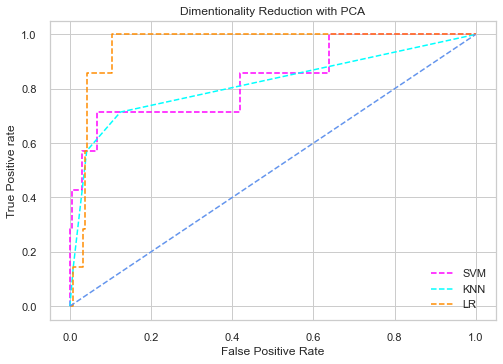

In [42]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Dimentionality Reduction with PCA')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("Dimentionality Reduction with PCA.png", dpi=300)

plt.show();